#**1. Problem statement:**
One of the most important problem in software engineering is to evaluate the probability that a software has defects and so indirectly evaluate its reliability. Predicting software defects is a difficult tasks, because there are many variables to be considered (including the human factor).

The provided labelled dataset contains a list of 21 features that can be used to predict software defects, for instance different measures of complexity of the software. Each row in the dataset is a different software. The output column is binary (0 no-defect, 1 defect).

#**2. Possible solution**
In this python notebook we will try to make a solution by applying mutiple Machine learning algorithm to find best algorithm which can predict our data for software defect.
To solve this problem we used open source libraries provided by scikit-learn. 
We first visualised the data and found that data is very imbalanced so we used roc_auc for cross validation as accuracy is not the good metrics to perform cross validation. During pre-processing we found around 1500 duplicates rows and have removed it from the Train data. We also found features are highly corelated so we removed some highly corelated features and found some faulty data where most of the rows are zero, so we have removed those rows as well from Train data.  <br>
We used T-SNE for data visualization and pertubation test to check for collinearity.<br>
**ML Algorithms used:** <br>
Logistic regression  <br>
SVM(Support Vector Machine) <br>
Random Forest <br>
GBDT(Gradient Boosted Decision Trees)<br>
MLP (MultiLayer Perceptron)<br>
Naive Bayes<br>
Stacking Classifier<br>


In [0]:
!pip3 install dask
!pip install graphviz
!pip install folium
!pip install gpxpy
!pip install gensim
!pip install prettytable
!pip install sklearn
!pip install dask[complete]
!pip3 install plotly 
!pip install dash==0.35.1  # The core dash backend
!pip install dash-html-components==0.13.4  # HTML components
!pip install dash-core-components==0.42.1  # Supercharged components
!pip3 install dash-table==3.1.11
!pip install scikit-plot
#!pip install --upgrade scikit-learn
#!pip install --pre -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn

     |████████████████████████████████| 112kB 40.0MB/s 
  Created wheel for gpxpy: filename=gpxpy-1.3.5-cp36-none-any.whl size=40315 sha256=a139f8f8e06608e5037d6b43dec3925d22e57dab6133e67389beae2ae68e343c
  Stored in directory: /root/.cache/pip/wheels/d2/f0/5e/b8e85979e66efec3eaa0e47fbc5274db99fd1a07befd1b2aa4
Successfully built gpxpy
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4039 sha256=50d2741240a4ca43a49f0d70d367c2903c65f8f237c8492b4d871a0aa1377135
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built locket
     |████████████████████████████████| 1.1MB 50.6MB/s 
  Created wheel for dash: filename=dash-0.35.1-cp36-none-any.whl size=41555 sha256=bd2ae44f69c18b366f8e17a46f4507e184582a6232ca137e8e01c757c3c75ff2
  Stored in directory: /root/.cache/pip/wheels/5a/c8/61/4daf9b3c3b33e8037294f3e694b84b2a6e04cf1d7ab6724fa5
  Created wheel for flask-compress: filename=Flask_Compress-1.4.0-cp3

#**3. Import libraries**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**4.Load data**

In [0]:
#loading the data
data = pd.read_csv(r'/content/drive/My Drive/train.csv')

In [0]:
#loading test data to be uploaded
data_test=pd.read_csv(r'/content/test.csv')

In [0]:
print("Number of data points ", data.shape)
print('-'*100)
print("The attributes of data :", data.columns.values)

Number of data points  (9380, 23)
----------------------------------------------------------------------------------------------------
The attributes of data : ['Id' 'loc' 'v(g)' 'ev(g)' 'iv(g)' 'n' 'v' 'l' 'd' 'i' 'e' 'b' 't'
 'lOCode' 'lOComment' 'lOBlank' 'locCodeAndComment' 'uniq_Op' 'uniq_Opnd'
 'total_Op' 'total_Opnd' 'branchCount' 'Category']


#**5. Dummy classifier**

In [0]:
df_train=data
df_test=data_test
X_train = df_train.iloc[:,1:-1].values#we discard the first column Id
y_train = df_train.iloc[:,-1].values#we want to predict Category


clf = DummyClassifier(strategy="most_frequent")#it implements the majority class classifier
clf.fit(X_train,y_train)

#input for the test set
X_test = df_test.iloc[:,1:].values

#prediction of the majority class classifier
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:

accuracy_score(y_train,clf.predict(X_train))


0.8075692963752665

**From Dummy model, we are able to compute 80% accuracy. So our model should get atleast more than this computed accuracy. **

#**6.Data visualization**

**6.1 Visualize Defect and non-Defect Data points**

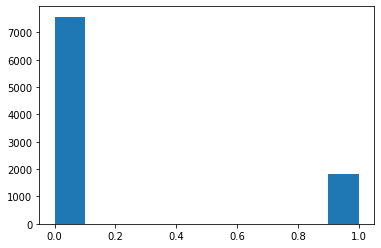

In [0]:
plt.hist(data.iloc[:,-1].values);

with this we observe that in our data we have imbalanced data points

**6.2 TSNE Data visualization technique**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


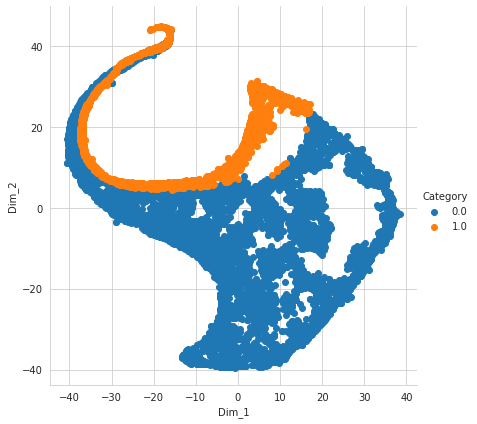

In [0]:
#Tsne is the well known visualization tehnique which converts n features space to two variable features space
#where we can vissualize the data easily
tsne_Data_main=data

y_tsne=tsne_Data_main['Category']
tsne_Data_main=tsne_Data_main.drop(['Category'],axis=1)

model = TSNE(n_components=2, random_state=0,perplexity=200)
tsne_data = model.fit_transform(tsne_Data_main)

tsne_data = np.vstack((tsne_data.T,y_tsne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Category"))

import seaborn as sn
sn.FacetGrid(tsne_df, hue="Category", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


Using above graph we observed that we can classify the data very easily as most of the data is easily separable.

**6.3 Pair plot to understand the relation between various features with each other **

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


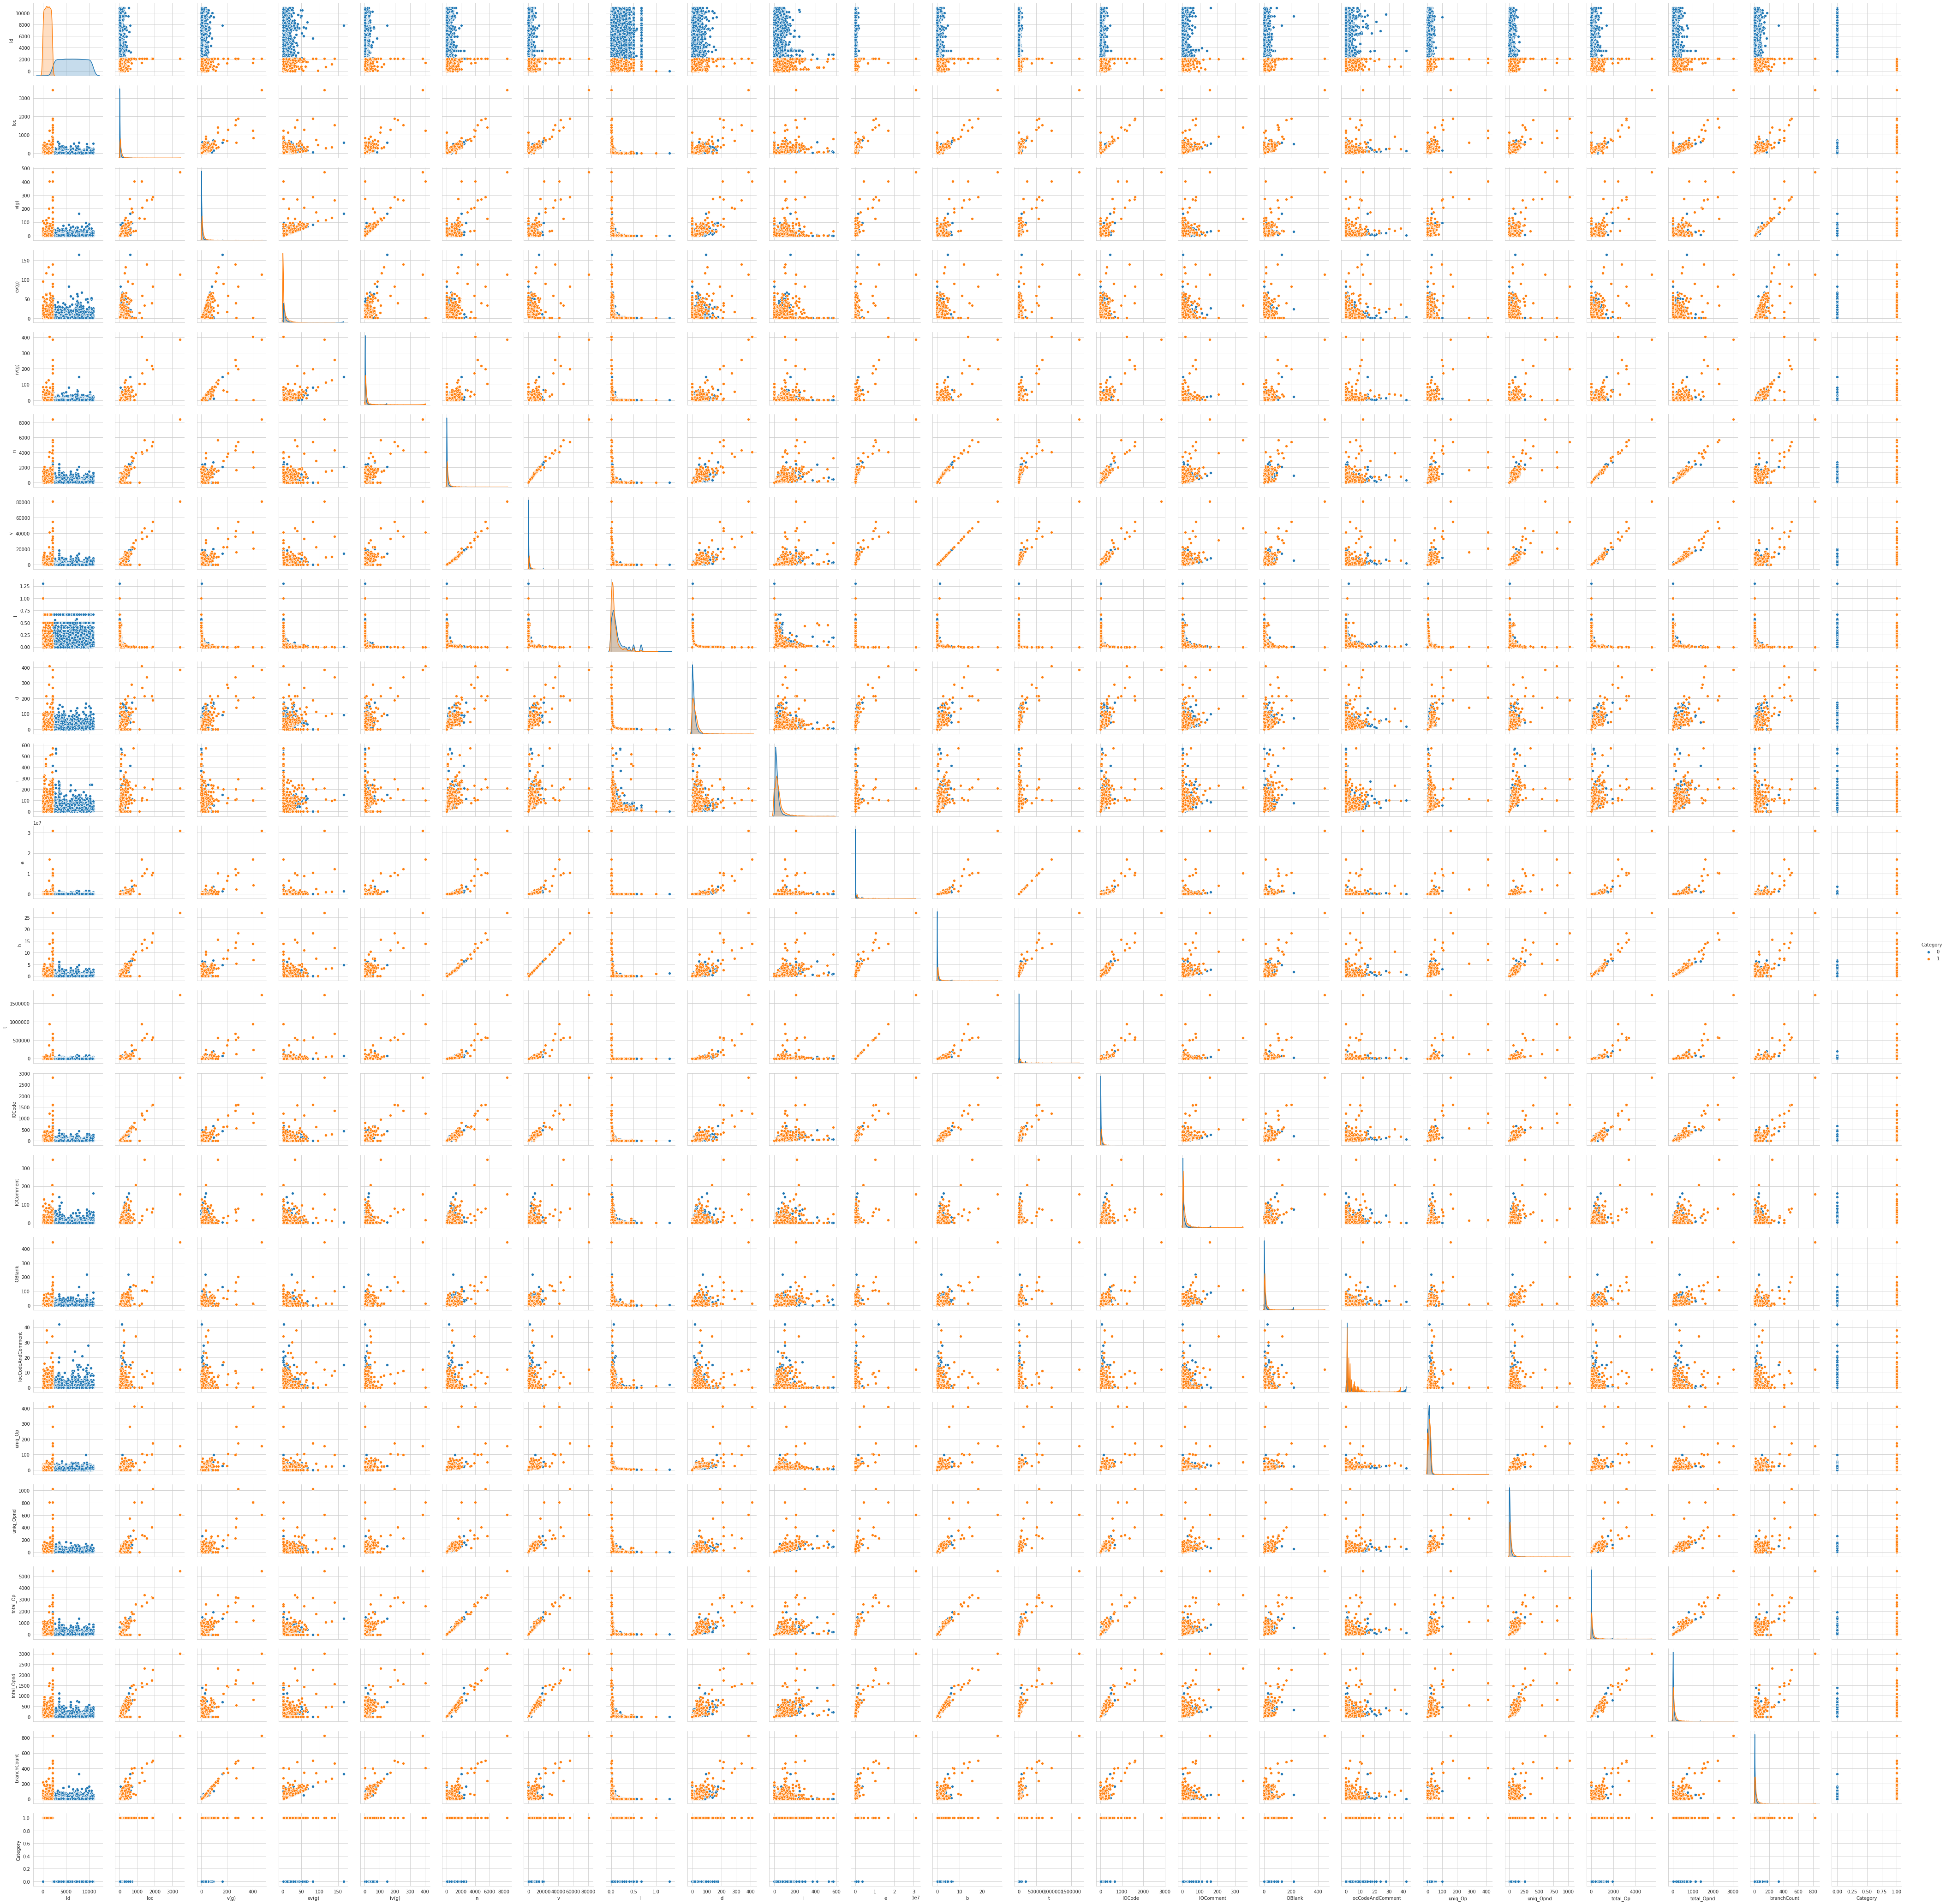

In [0]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="Category");
plt.show()

**6.4 Pertubation Test and collinearity test**





In pertubation test we add noise and compare our model before adding noise and after adding noise if we get large difference that means there is a collinearity and we need to remove those features

In [0]:
data_per=data.drop(['Id'],axis=1)
y=data_per['Category']
x=data_per.drop(['Category'],axis=1)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

In [0]:
clf_model=LogisticRegression(C=1, penalty='l1')
clf = clf_model.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)
w = clf.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8128997867803838


In [0]:
X_train_vect_pert1=x_train

In [0]:
X_train_vect_pert1=X_train_vect_pert1+0.1

In [0]:
clf_model_pert=LogisticRegression(C=0.01, penalty='l1')
clf_pert = clf_model_pert.fit(X_train_vect_pert1,y_train)
w_pert = clf_pert.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
diff=(w_pert)-(w)

In [0]:
percen=np.divide(diff,w)

In [0]:
percen[np.isnan(percen)] = 0

In [0]:
percen_mean=np.mean(percen)

In [0]:
abs(percen_mean*100)
# we are getting  92% difference so we need to check for collinearity

92.99398601119134

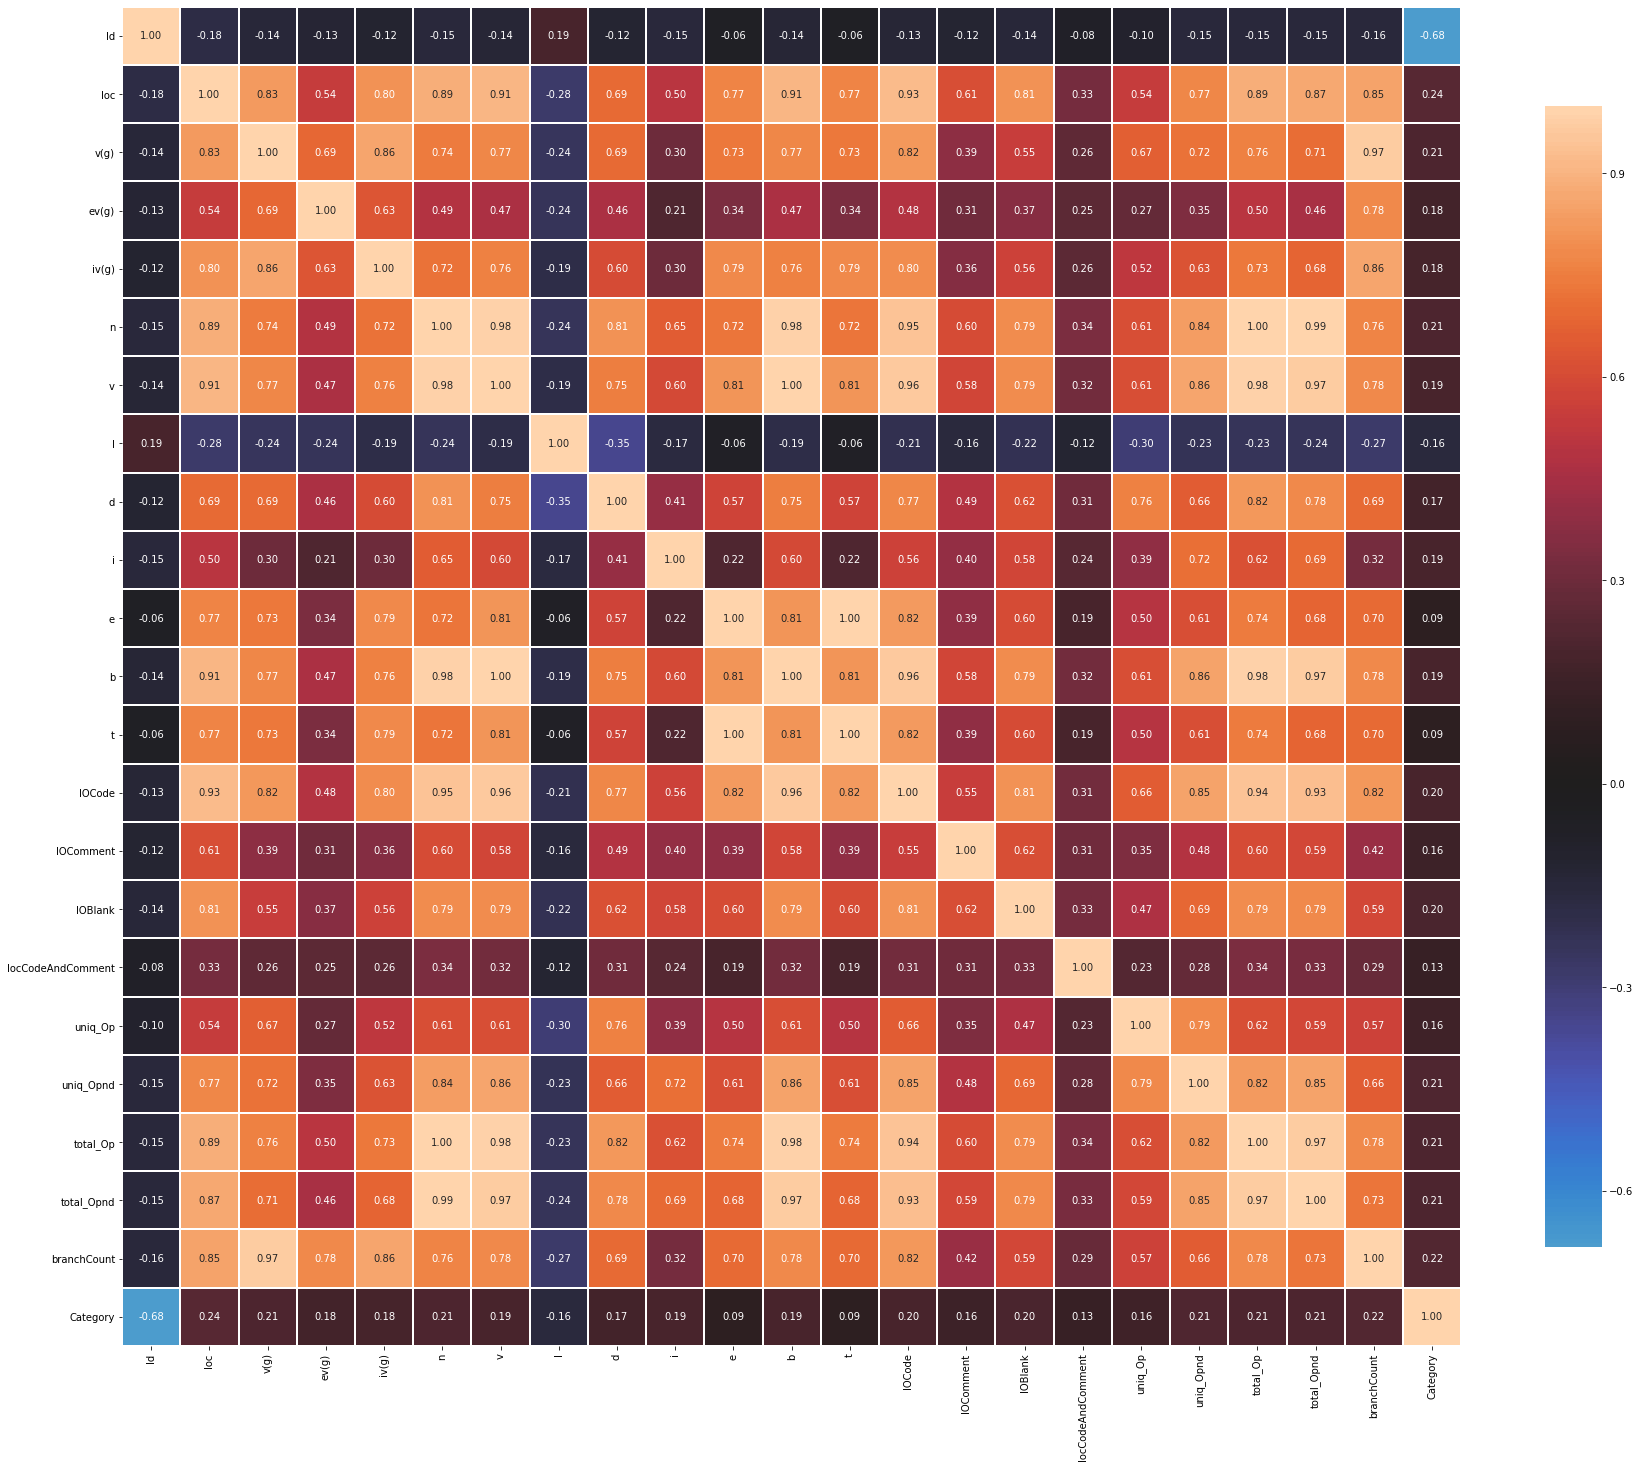

In [0]:
# ref: https://stackoverflow.com/questions/39409866/correlation-heatmap
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=1, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data)

In [0]:

#ref: https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)


['v', 'b', 't', 'lOCode', 'total_Op', 'total_Opnd', 'branchCount']


**['v', 'b', 't', 'lOCode', 'total_Op', 'total_Opnd', 'branchCount'] these are the collinear features that we need to remove **

In [0]:
df=data.drop_duplicates()

In [0]:
df.shape

(7772, 22)

In [0]:
data .shape

(9380, 22)

** From this we conclude that there are total 1608 duplicate rows that needs to be removed.**

#**7. Data Preprocessing**

In [0]:
df = data.drop_duplicates()
print(df)

In [0]:
data.head(2)

Id   loc  v(g)  ev(g)  ...  total_Op  total_Opnd  branchCount  Category
0  8255  25.0   4.0    1.0  ...      52.0        30.0          7.0         0
1  7507  40.0  12.0   12.0  ...      87.0        59.0         23.0         0

[2 rows x 23 columns]

In [0]:
#Here we observe something unusual where there is n=0 all other values are also 0 let's try to remove these from our training data
data[data['n'] == 0]

Id    loc  v(g)  ev(g)  ...  total_Op  total_Opnd  branchCount  Category
7     7816   73.0   7.0    1.0  ...       0.0         0.0         11.0         0
11    5010   88.0  20.0   15.0  ...       0.0         0.0         39.0         0
50    1370  156.0  18.0   13.0  ...       0.0         0.0         35.0         1
54    4402   42.0   8.0    8.0  ...       0.0         0.0         15.0         0
56    5431   37.0   6.0    4.0  ...       0.0         0.0         11.0         0
...    ...    ...   ...    ...  ...       ...         ...          ...       ...
9346  4662   17.0   3.0    3.0  ...       0.0         0.0          5.0         0
9352  2750   65.0  25.0    1.0  ...       0.0         0.0         49.0         0
9355  2561   15.0   4.0    4.0  ...       0.0         0.0          7.0         0
9368   771   84.0  11.0   10.0  ...       0.0         0.0         21.0         1
9372  4430   44.0   6.0    6.0  ...       0.0         0.0         11.0         0

[1146 rows x 23 columns]

In [0]:
#Lets drop id as it is just id of 
data=data.drop(['Id'],axis=1)

In [0]:
#let's separate value to be predicted from the data
Y=data['Category']

In [0]:
#let's assign training data to X
X=data.drop(['Category','v', 'b', 't', 'lOCode', 'total_Op', 'total_Opnd', 'branchCount'],axis=1)

#**8. Data preparation**

In [0]:
#in this step we are dividing our data into train and test, here we are taking 80% train data and 20% test data
#we took this proportion because we don't have large data to train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

In [0]:
print("Number of data points in train data", X_train.shape)
print('-'*100)
print("The attributes of data :", X_train.columns.values)

Number of data points in train data (7504, 14)
----------------------------------------------------------------------------------------------------
The attributes of data : ['loc' 'v(g)' 'ev(g)' 'iv(g)' 'n' 'l' 'd' 'i' 'e' 'lOComment' 'lOBlank'
 'locCodeAndComment' 'uniq_Op' 'uniq_Opnd']


In [0]:
print("Number of data points in train data", X_train.shape)
print(X_train.columns.values)
X_train.head(5)

Number of data points in train data (7504, 14)
['loc' 'v(g)' 'ev(g)' 'iv(g)' 'n' 'l' 'd' 'i' 'e' 'lOComment' 'lOBlank'
 'locCodeAndComment' 'uniq_Op' 'uniq_Opnd']


loc  v(g)  ev(g)  iv(g)  ...  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd
5920  11.0   2.0    1.0    2.0  ...      0.0                0.0      5.0        6.0
5796  10.0   2.0    1.0    2.0  ...      1.0                0.0      9.0        9.0
1004   6.0   1.0    1.0    1.0  ...      1.0                1.0      2.0        0.0
5177  34.0   9.0    9.0    7.0  ...      4.0                0.0     15.0       15.0
4889  15.0   2.0    1.0    2.0  ...      2.0                0.0     11.0       12.0

[5 rows x 14 columns]

In [0]:
#concatinating the X_train, Y_train to remove all the faluty data points from our training data and again splitting
X = pd.concat([X_train, Y_train], axis=1)

In [0]:
#drop all rows with 
X.drop(X.loc[X['n']==0].index, inplace=True)

In [0]:
X.drop_duplicates(inplace = True) 

In [0]:
Y_train=X['Category']

In [0]:
X_train=X.drop(['Category'],axis=1)

In [0]:
#we use standard scaling to bring values of all columns to same scale
#z = (x - u) / s, u is the mean and s is the standard deviation
transformer = StandardScaler().fit(X_train)
X_train=transformer.transform(X_train)
X_test=transformer.transform(X_test)

In [0]:
data_test_new=transformer.transform(data_test)

In [0]:
#Here we plot confusion matrix 
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    labels = [0,1]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

#**9.ML Models**

**9.1 Logistic regression**

Logistic regression optimization equation is 
argmin sum(log(1+exp(-yW.T x))+lambda w^2) <br>
if lambda=0 it will overfit as regularization term will become 0 and if we make it very large it will underfit. <br>
where lambda is hyperparameter 
and c=1/lambda
we are trying to find 'c' as  the best parameter using random search where we took roc_auc as the metrics because data is very imbalanced.

In [0]:
# Create regularization hyperparameter distribution using uniform distribution
C = sp_rand(loc=0, scale=4)
  
# Create hyperparameter options
hyperparameters = dict(C=C)



#here we took roc_auc as scoring matrix because we have very imbalance data as we have discussed earlier now having
#accuracy as matrix won't give good results so we have used roc_auc for cross validation.
model_random = RandomizedSearchCV(LogisticRegression(),hyperparameters,n_iter=500, cv=10,scoring = 'roc_auc')
model_random.fit(X_train, Y_train)
print(model_random.best_estimator_)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticRegression(C=3.9860601523805474, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
print(model_random.best_estimator_)
print(model_random.score(X_test, Y_test))

LogisticRegression(C=3.9860601523805474, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9991924195111447


In [0]:
clf_model=LogisticRegression(C=3.9860601523805474, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, tol=0.0001, verbose=0,
                   warm_start=False)
clf_model.fit(X_train, Y_train)

In [0]:
Y_predict=clf_model.predict(X_test)

-------------------- Confusion matrix --------------------


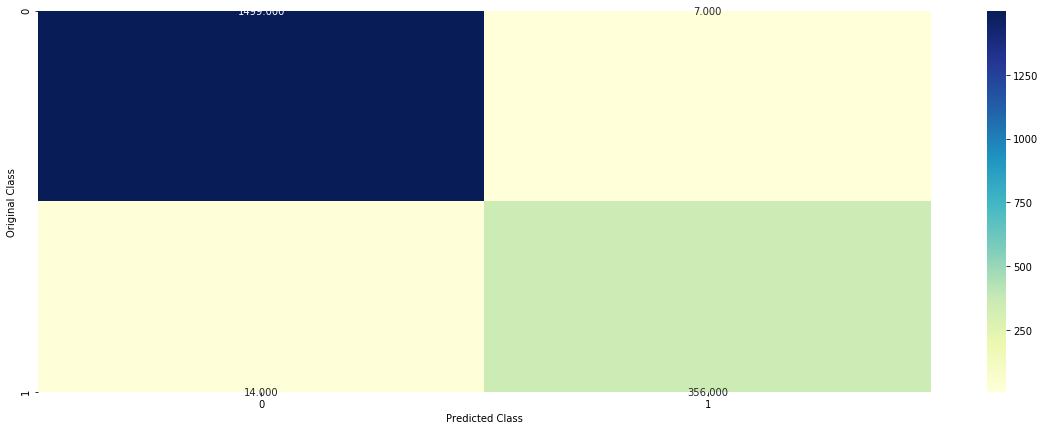

-------------------- Precision matrix (Columm Sum=1) --------------------


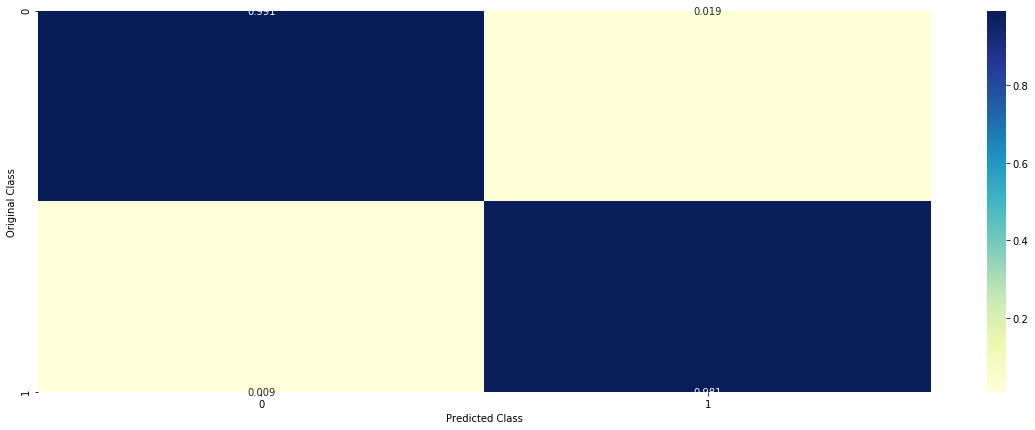

-------------------- Recall matrix (Row sum=1) --------------------


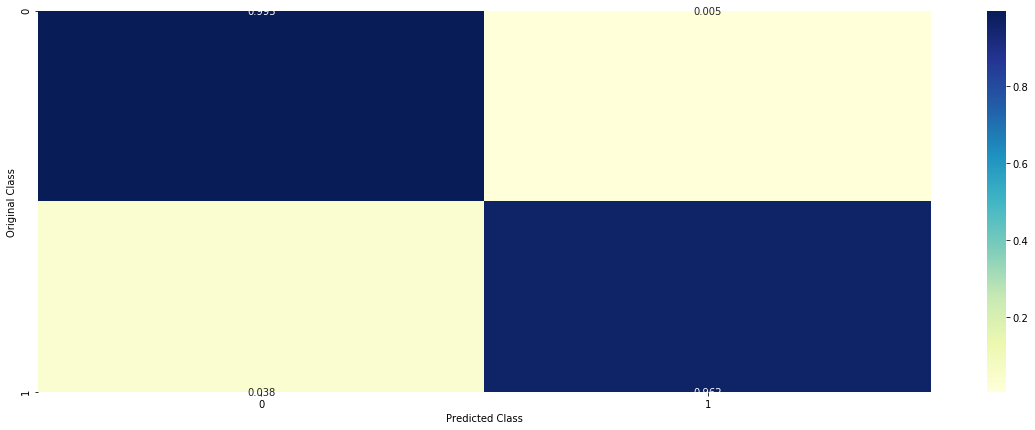

In [0]:
plot_confusion_matrix(Y_test,Y_predict)

**Confusion, Precision and Recall matrix explanation**
1. Confusion matrix
   For confusion matrix our logistic regression model        predicted only 14+7 data points inaccurately <BR>

2. Precision matrix 
   precision=TP/TP+FP
   which makes column sum 1
   precision tells us model predicted positive 
   what percentage actually predicted positive<BR>

3. Recall matrix
   recall=TP/TP+FN
   which makes row sum as 1
   Recall tells us of all the original true data 
   points what percentage our model predicted positive

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict)
metrics.auc(fpr, tpr)

0.9888805139801156

In [0]:
print("*********************************************accuracy*********************************")
print(accuracy_score(Y_test, Y_predict))
print("*********************************************f1_score*********************************")
print(f1_score(Y_test, Y_predict))
print("*********************************************recall_score*****************************")
print(recall_score(Y_test, Y_predict))
print("*********************************************precision_score**************************")
print(precision_score(Y_test, Y_predict))

*********************************************accuracy*****************************
0.9888059701492538
*********************************************f1_score*****************************
0.9713506139154161
*********************************************recall_score*****************************
0.9621621621621622
*********************************************precision_score*****************************
0.9807162534435262


**9.2 Random Forest**

Random forest is the type of ensemble model which means it is the group of multiple base models.
Idea is to combine all models and come with big model.
Decision tree sometimes increases in length which causes high variance and low bias problem so to avoid it, we make multiple trees and combine them using bagging where we get low bias and reduced variance solution.
**RF=DT+BAGGING+COL_SAMPLING**
Bagging is simply row sampling with replacement.
Similarly, we have used two hyperparameters "no of trees"i.e no of estimators and "max depth" any tree can have

In [0]:
tuned_parameters = [{'max_depth': [10,50,80,100],'n_estimators': [100,500,700,1000]}]

clf = RandomForestClassifier(criterion='gini',min_samples_leaf=4)
model_rf_grid = GridSearchCV(clf,tuned_parameters, cv=10,scoring = 'roc_auc',n_jobs=-1,return_train_score='true')
model_rf_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [0]:
print("train mean score for different parameters",model_rf_grid.cv_results_['mean_train_score'])

train mean score for different parameters [0.99999974 0.99999981 0.99999985 0.99999983 0.99999983 0.99999991
 0.99999994 1.         0.99999983 0.99999989 0.99999998 0.99999996
 0.99999972 0.99999992 0.99999996 0.99999994]


In [0]:
print("best estimator",model_rf_grid.best_estimator_)
print("Score",model_rf_grid.score(X_test, Y_test))
print("best params",model_rf_grid.best_params_)

best estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score 0.9999946161300743
best params {'max_depth': 80, 'n_estimators': 1000}


In [0]:
#training your model on best parameters
clf_model_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf_model_rf.fit(X_train, Y_train)
Y_predict_rf=clf_model_rf.predict(X_test)
Y_prob_rf=clf_model_rf.predict_proba(X_test)

In [0]:
print("*********************************************accuracy*********************************")
print(accuracy_score(Y_test, Y_predict_rf))
print("*********************************************f1_score*********************************")
print(f1_score(Y_test, Y_predict_rf))
print("*********************************************recall_score*****************************")
print(recall_score(Y_test, Y_predict_rf))
print("*********************************************precision_score**************************")
print(precision_score(Y_test, Y_predict_rf))

*********************************************accuracy*********************************
0.9994669509594882
*********************************************f1_score*********************************
0.9986468200270636
*********************************************recall_score*****************************
0.9972972972972973
*********************************************precision_score**************************
1.0


In [0]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_prob_rf[:,1])

In [0]:
print("AUC",metrics.auc(fpr, tpr))

AUC 0.9999946161300742


Receiver operating characterstic curve(ROC)
On y axis we have TPR i.e true positive/Total number of positive and on x axis we have FPR i.e False positive /Total positive
More the value of ROC better is the model 




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


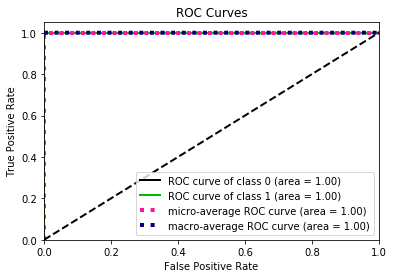

In [0]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(Y_test, Y_prob_rf)
plt.show()

-------------------- Confusion matrix --------------------


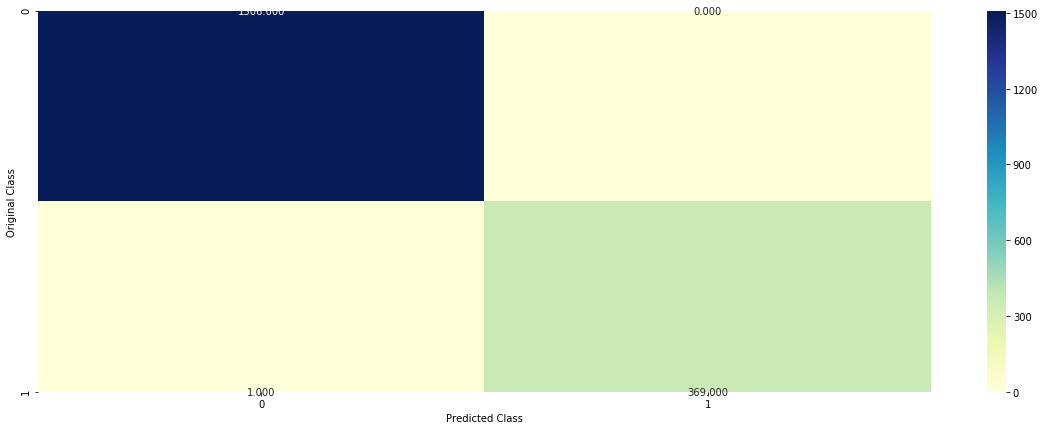

-------------------- Precision matrix (Columm Sum=1) --------------------


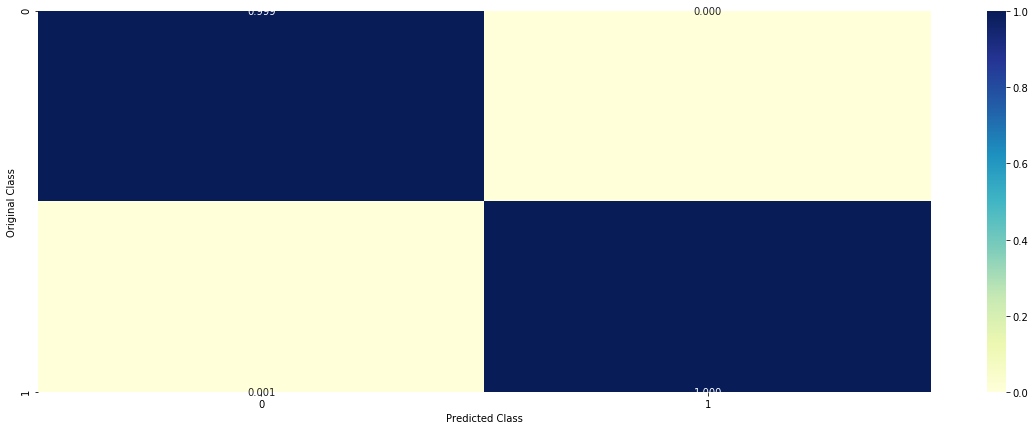

-------------------- Recall matrix (Row sum=1) --------------------


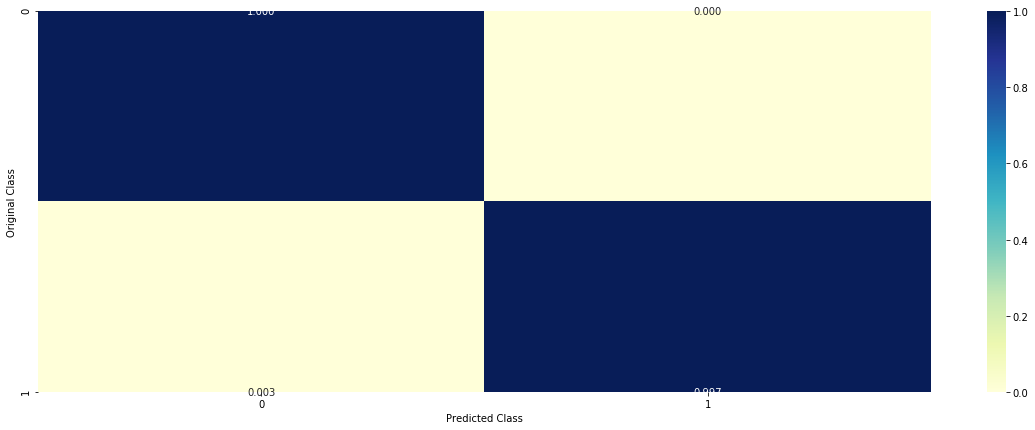

In [0]:
plot_confusion_matrix(Y_test,clf_model_rf.predict(X_test))

**Confusion,Precision and Recall matrix explanation**
1. Confusion matrix
   For confusion matrix our logistic regression model        predicted only 1+0 data points inaccurately <br>

2. Precision matrix 
   precision=TP/TP+FP
   which makes column sum 1
   precision tells us model predicted positive 
   what percentage actually predicted positive <br>

3. Recall matrix
   recall=TP/TP+FN
   which makes row sum as 1
   Recall tells us of all the original true data 
   points what percentage our model predicted positive

**9.3 SVM(Support vector machine)**

Support vector machine tries to find the hyperplane that maximizes margin i.e distance between positive hyperplane and negative hyperplane.
SVM is hinge loss + regression
so if we give loss as hinge in stochastic gradient descent classifier we will get svm.
Hinge loss:-  <br> z>=1 hinge loss=0  <br>
             z<1  hinge loss=1-z   <br>
             z=y(w.T*x+b)     <br>

alpha is the hyperparameter for svm 
optimization equation is 
min sum(max(0,(1-y(w^tx+b)))+lambda w^2)

In [0]:
tuned_parameters = [{'alpha': [10**-4,10**-3,10**-2, 10**-1, 10**0,10**1,10**2, 10**3,10**4]}]
cv_scores = []
clf_svm = linear_model.SGDClassifier(loss='hinge', penalty='l1')
model_grid_svm = GridSearchCV(clf_svm, tuned_parameters, cv=10,return_train_score='True',scoring='roc_auc')
model_grid_svm.fit(X_train, Y_train)
print(model_grid_svm)
print(model_grid_svm.best_estimator_)
print(model_grid_svm.score(X_test, Y_test))
cv_auc_train = model_grid_svm.cv_results_['mean_train_score']
cv_auc_cv=model_grid_svm.cv_results_['mean_test_score']

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l1', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score='Tr

In [0]:
print(model_grid_svm.best_estimator_)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [0]:
clf_model_svm=linear_model.SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='hinge', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
clf_model_svm.fit(X_train, Y_train)

Y_predict_svm=clf_model_svm.predict(X_test)
Y_predict_conf_linear_svm=Y_predict_svm.decision_function(X_test)


In [0]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_conf_linear_svm)
metrics.auc(fpr, tpr)

0.9997882344495891

In [0]:
print("*********************************************accuracy*********************************")
print(accuracy_score(Y_test, Y_predict_svm))
print("*********************************************f1_score*********************************")
print(f1_score(Y_test, Y_predict_svm))
print("*********************************************recall_score*****************************")
print(recall_score(Y_test, Y_predict_svm))
print("*********************************************precision_score**************************")
print(precision_score(Y_test, Y_predict_svm))

*********************************************accuracy*********************************
0.997867803837953
*********************************************f1_score*********************************
0.9945652173913043
*********************************************recall_score*****************************
0.9891891891891892
*********************************************precision_score**************************
1.0


-------------------- Confusion matrix --------------------


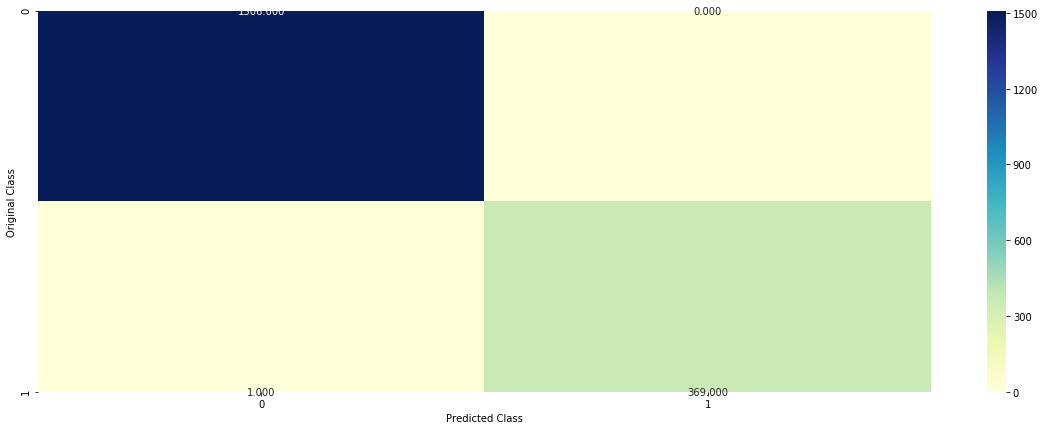

-------------------- Precision matrix (Columm Sum=1) --------------------


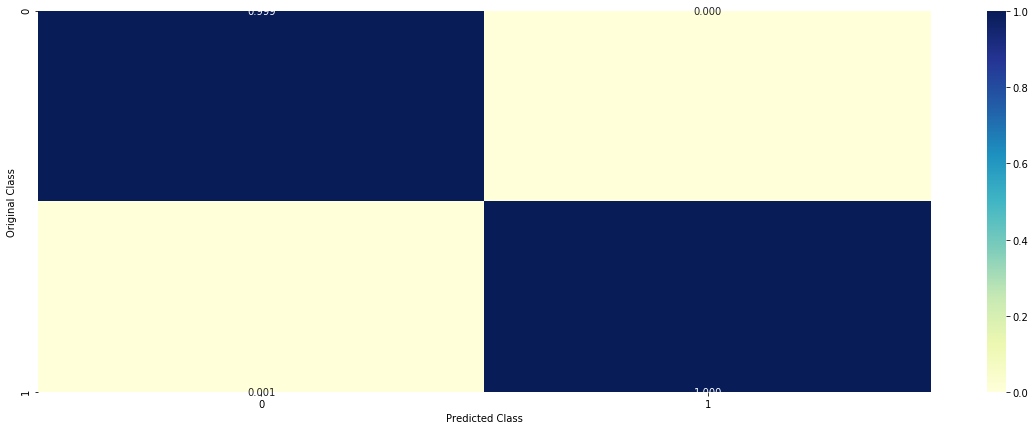

-------------------- Recall matrix (Row sum=1) --------------------


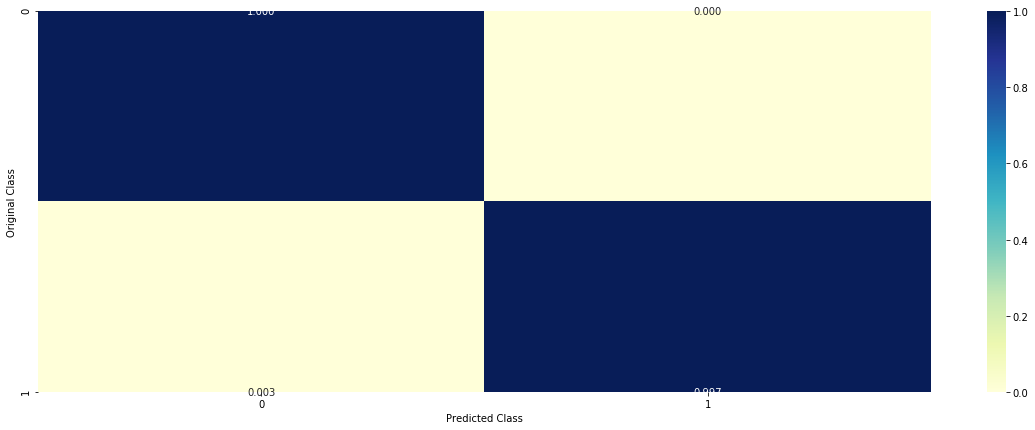

In [0]:
plot_confusion_matrix(Y_test,Y_predict_svm)

**Confusion, Precision and Recall matrix explanation**

1. Confusion matrix
   For confusion matrix our logistic regression model        predicted only 0+1 data points inaccurately 

2. Precision matrix 
   precision=TP/TP+FP
   which makes column sum 1
   precision tells us model predicted positive 
   what percentage actually predicted positive

3. Recall matrix
   recall=TP/TP+FN
   which makes row sum as 1
   Recall tells us of all the original true data 
   points what percentage our model predicted positive

**9.4 GBDT**

GBDT algorith is also the type of ensemble algorithm same as RF which we have disussed above but it is little bit different from RF in a way that in RF multiple tree construction takes place parallel way but in GBDT it is in sequential way that means learning from past mistakes of last tree.
In this also,we have same hyperparameter as discussed in RF.

In [0]:
tuned_parameters = [{'max_depth': [10,20,40,80],'n_estimators': [100,500,700,1000]}]
#cv_scores = []
#clf = GradientBoostingClassifier(max_features='log2',min_samples_leaf=4)
clf=XGBClassifier()
model_gbdt = GridSearchCV(clf,tuned_parameters, cv=10,return_train_score='True',scoring='roc_auc',n_jobs=-1)
model_gbdt.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_depth': [10, 20, 40, 80],
                          'n_estimators': [100, 500, 700, 1000]}],
             pre_dispatch='2*n_jobs', refit=T

In [0]:
print("best estimator",model_gbdt.best_estimator_)
print("Score",model_gbdt.score(X_test, Y_test))
print(model_gbdt.best_params_)

best estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Score 0.9997020925307779
{'max_depth': 10, 'n_estimators': 100}


In [0]:
cv_gbdt_train = model_gbdt.cv_results_['mean_train_score']
cv_gbdt_cv=model_gbdt.cv_results_['mean_test_score']

In [0]:
print(cv_gbdt_train)
print(cv_gbdt_cv)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.99990711 0.99990711 0.99990711 0.99990711 0.99990711 0.99990711
 0.99990711 0.99990711 0.99990711 0.99990711 0.99990711 0.99990711
 0.99990711 0.99990711 0.99990711 0.99990711]


In [0]:
clf_model_gbdt=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

clf_model_gbdt.fit(X_train, Y_train)

Y_predict_gbdt=clf_model_gbdt.predict(X_test)

Y_prob_gbdt=clf_model_gbdt.predict_proba(X_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_prob_gbdt[:,1])
print("AUC",metrics.auc(fpr, tpr))

AUC 0.9997020925307779


In [0]:
print("*********************************************accuracy*********************************")
print(accuracy_score(Y_test, Y_predict_gbdt))
print("*********************************************f1_score*********************************")
print(f1_score(Y_test, Y_predict_gbdt))
print("*********************************************recall_score*****************************")
print(recall_score(Y_test, Y_predict_gbdt))
print("*********************************************precision_score**************************")
print(precision_score(Y_test, Y_predict_gbdt))

*********************************************accuracy*********************************
0.9994669509594882
*********************************************f1_score*********************************
0.9986468200270636
*********************************************recall_score*****************************
0.9972972972972973
*********************************************precision_score**************************
1.0


-------------------- Confusion matrix --------------------


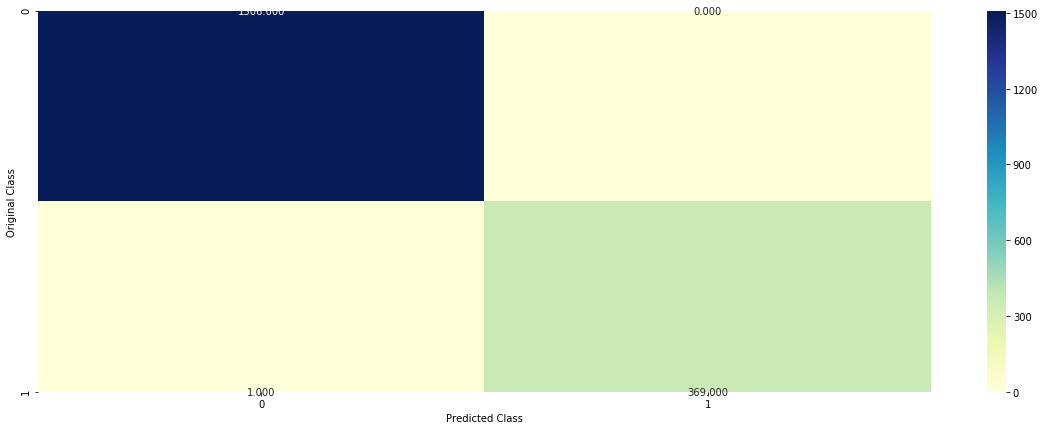

-------------------- Precision matrix (Columm Sum=1) --------------------


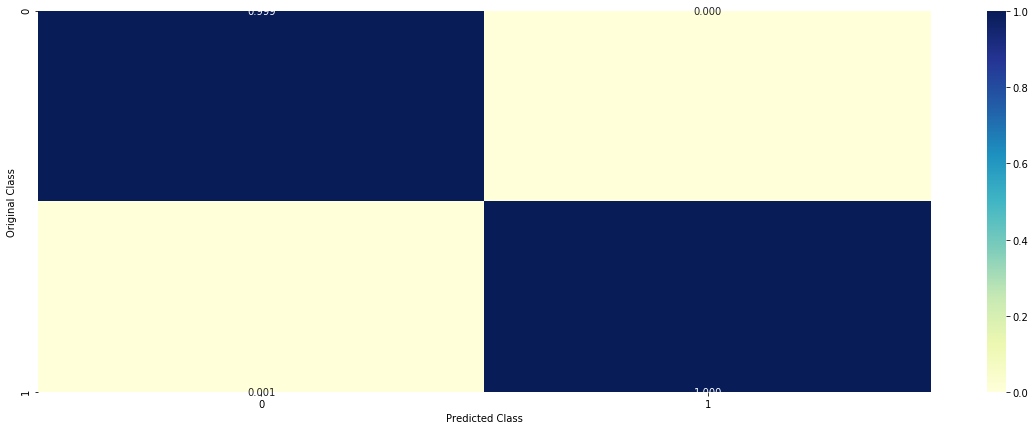

-------------------- Recall matrix (Row sum=1) --------------------


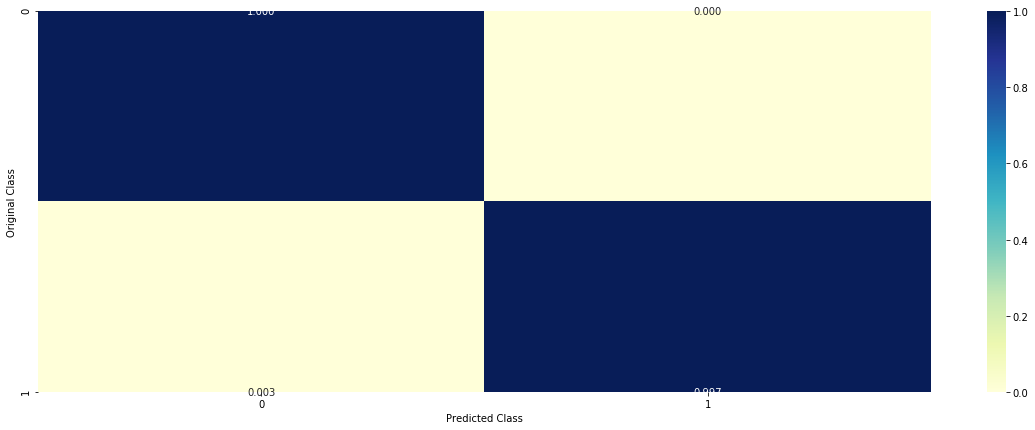

In [0]:
plot_confusion_matrix(Y_test,Y_predict_gbdt)

**Confusion, Precision and Recall matrix explanation**

1. Confusion matrix
   For confusion matrix our logistic regression model        predicted only 0+1 data points inaccurately 

2. Precision matrix 
   precision=TP/TP+FP
   which makes column sum 1
   precision tells us model predicted positive 
   what percentage actually predicted positive

3. Recall matrix
   recall=TP/TP+FN
   which makes row sum as 1
   Recall tells us of all the original true data 
   points what percentage our model predicted positive

**9.5 MLP(Multilayer perceptron)**
This is one type of neural network which is the combination of mutiple perceptron in multiple layers.
Learning rate is the hyperparameter in backpropagation for finding best weights where we can learn our model.
Here we take multiple optimizers like lbfgs,sgd,adam
sgd is simple stochastic gradient descent technique to fnd optimum weights but it's not the best technique as we can have mutiple minimas.
Better optimizer is **ADAM(Adaptive moment estimator)**

ADAM uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

In [0]:
tuned_parameters = [{'learning_rate_init': [0.01,0.1],'solver': ['lbfgs', 'sgd', 'adam']}]

clf_mlp = MLPClassifier(hidden_layer_sizes=(5,4,3), max_iter=30000,activation="tanh")

clf_mlp_grid = GridSearchCV(clf_mlp,tuned_parameters, cv=10,return_train_score='True',scoring='roc_auc')
clf_mlp_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='tanh', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(5, 4, 3),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=30000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid

In [0]:
clf_mlp_grid.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 4, 3), learning_rate='constant',
              learning_rate_init=0.01, max_iter=30000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
print(clf_mlp_grid.cv_results_['mean_train_score'])

[0.99993294 0.9995677  0.99988207 0.99992467 0.99981629 0.99663993]


In [0]:
print(clf_mlp_grid.cv_results_['mean_test_score'])

[0.9997448  0.99936957 0.99981356 0.99971872 0.99957771 0.99728273]


In [0]:
mlp_classifier = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 4, 3), learning_rate='constant',
              learning_rate_init=0.01, max_iter=30000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
mlp_classifier.fit(X_train,Y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 4, 3), learning_rate='constant',
              learning_rate_init=0.01, max_iter=30000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
Y_predict_mlp=mlp_classifier.predict(X_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_mlp)
metrics.auc(fpr, tpr)

0.9889271741861383

In [0]:
print("*********************************************accuracy*********************************")
print(accuracy_score(Y_test, Y_predict_mlp))
print("*********************************************f1_score*********************************")
print(f1_score(Y_test, Y_predict_mlp))
print("*********************************************recall_score*****************************")
print(recall_score(Y_test, Y_predict_mlp))
print("*********************************************precision_score**************************")
print(precision_score(Y_test, Y_predict_mlp))

*********************************************accuracy*********************************
0.990405117270789
*********************************************f1_score*********************************
0.9759358288770054
*********************************************recall_score*****************************
0.9864864864864865
*********************************************precision_score**************************
0.9656084656084656


-------------------- Confusion matrix --------------------


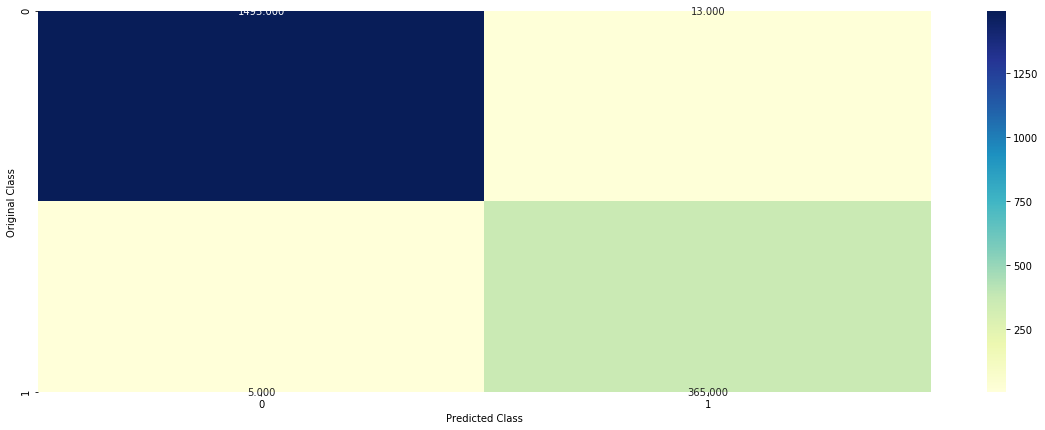

-------------------- Precision matrix (Columm Sum=1) --------------------


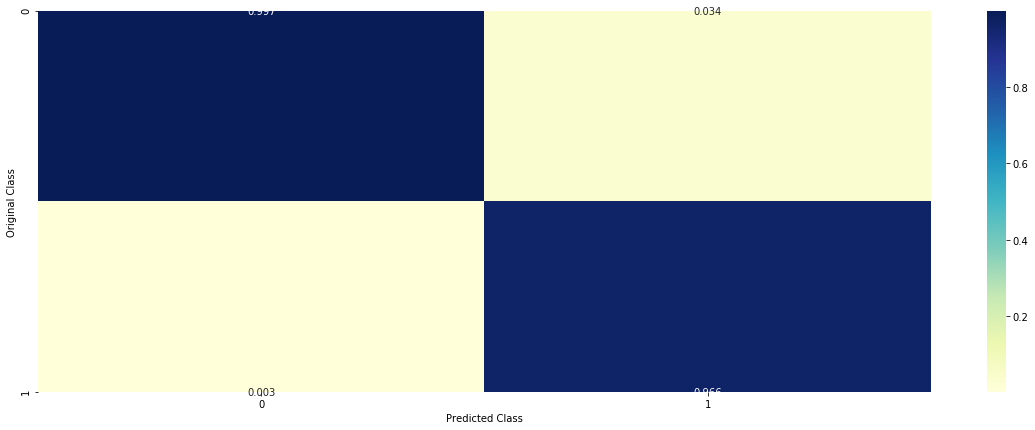

-------------------- Recall matrix (Row sum=1) --------------------


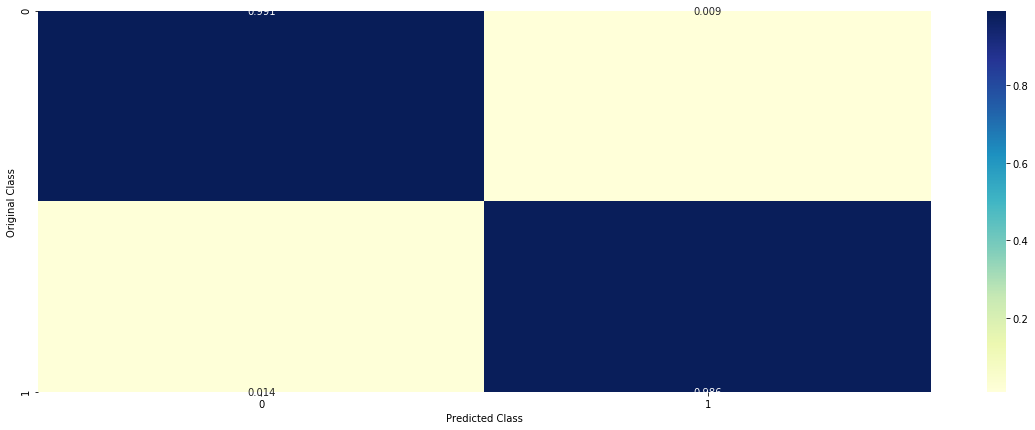

In [0]:
plot_confusion_matrix(Y_test,Y_predict_mlp)

Confusion, Precision and Recall matrix explanation

1. Confusion matrix
   For confusion matrix our logistic regression model        predicted only 13+5 data points inaccurately 

2. Precision matrix 
   precision=TP/TP+FP
   which makes column sum 1
   precision tells us model predicted positive 
   what percentage actually predicted positive

3. Recall matrix
   recall=TP/TP+FN
   which makes row sum as 1
   Recall tells us of all the original true data 
   points what percentage our model predicted positive

**9.6 NB(Naive bayes)**

The smoothing priors alpha>=0 accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting alpha=1 is called Laplace smoothing, while alpha<1 is called Lidstone smoothing.

In [0]:
est = KBinsDiscretizer(n_bins=10,encode='onehot',strategy='uniform')
est.fit(X_train)
Xt_train = est.transform(X_train)
Xt_test  = est.transform(X_test)

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
score=0
n_bins_update=0   #initializing best bin we will get after cross validation
tuned_parameters = [{'alpha': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
best_model=GridSearchCV(BernoulliNB(), tuned_parameters)
for n_bins in range(2,10): #calculating nbins

    est = KBinsDiscretizer(n_bins=n_bins,encode='onehot',strategy='uniform')
    est.fit(X_train)
    Xt_train = est.transform(X_train)
    Xt_test  = est.transform(X_test)


   

    model = GridSearchCV(BernoulliNB(), tuned_parameters, scoring = 'f1', cv=10)
    model.fit(Xt_train, Y_train)
    print("*************",n_bins,"***********",model.best_estimator_)
    print(model.score(Xt_test, Y_test))

    #getting best model
    if(score<model.score(Xt_test, Y_test)) :
        best_model=model
        n_bins_update=n_bins

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

************* 2 *********** BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
0.04712041884816754


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

************* 3 *********** BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
0.09359605911330049


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

************* 4 *********** BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)
0.1355140186915888


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

************* 5 *********** BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
0.16742081447963802


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

************* 6 *********** BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True)
0.23553719008264465


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

************* 7 *********** BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
0.27005870841487284


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

************* 8 *********** BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
0.268
************* 9 *********** BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
0.28070175438596495


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

In [0]:
print("best estimator",best_model.best_estimator_)
#print("Score",model_gbdt.score(X_test, Y_test))
#print(model_gbdt.best_params_)

best estimator BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)


In [0]:
from sklearn.naive_bayes import BernoulliNB
est = KBinsDiscretizer(n_bins=n_bins_update,encode='onehot',strategy='uniform')
    est.fit(X_train)
    Xt_train = est.transform(X_train)
    Xt_test  = est.transform(X_test)
clf_model_nb=BernoulliNB(alpha=0.0001, binarize=0.0, class_prior=None, fit_prior=True)
clf_model_nb.fit(Xt_train, Y_train)
Y_predict_nb=clf_model_nb.predict(Xt_test)

In [0]:
Y_prob_nb=clf_model_nb.predict_proba(Xt_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_prob_nb[:,1])
print("AUC",metrics.auc(fpr, tpr))

AUC 0.6557535623272674


In [0]:
print("*********************************************accuracy*********************************")
print(accuracy_score(Y_test, Y_predict_nb))
print("*********************************************f1_score*********************************")
print(f1_score(Y_test, Y_predict_nb))
print("*********************************************recall_score*****************************")
print(recall_score(Y_test, Y_predict_nb))
print("*********************************************precision_score**************************")
print(precision_score(Y_test, Y_predict_nb))

*********************************************accuracy*********************************
0.8033049040511727
*********************************************f1_score*********************************
0.28070175438596495
*********************************************recall_score*****************************
0.1945945945945946
*********************************************precision_score**************************
0.5034965034965035


As expected naibe bayes wont perform good as during discritizer we lost som information which can be useful for making prediction

-------------------- Confusion matrix --------------------


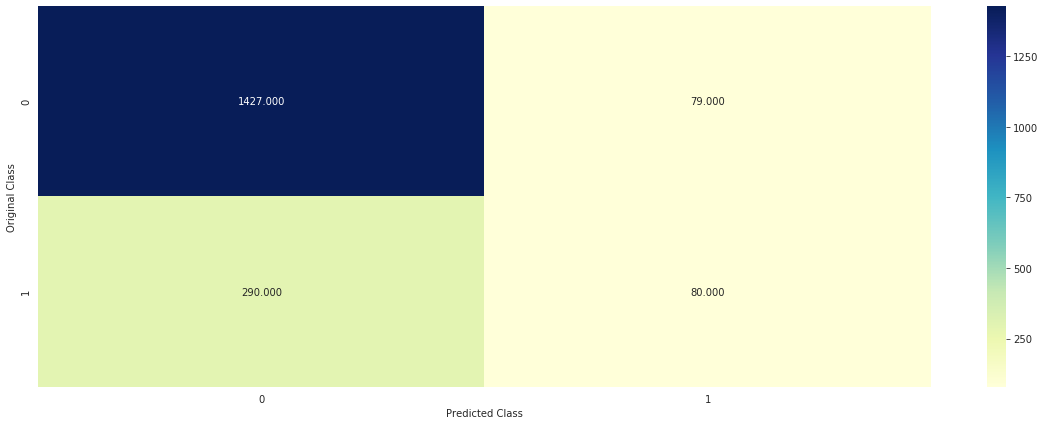

-------------------- Precision matrix (Columm Sum=1) --------------------


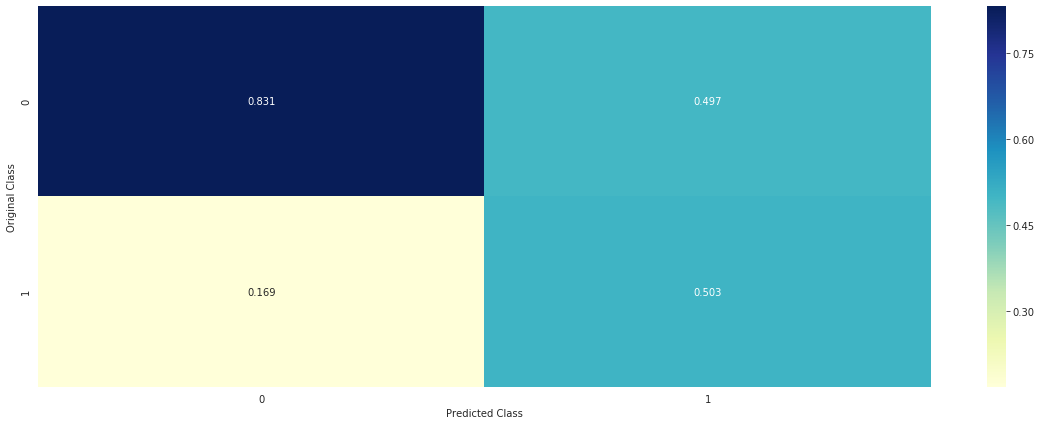

-------------------- Recall matrix (Row sum=1) --------------------


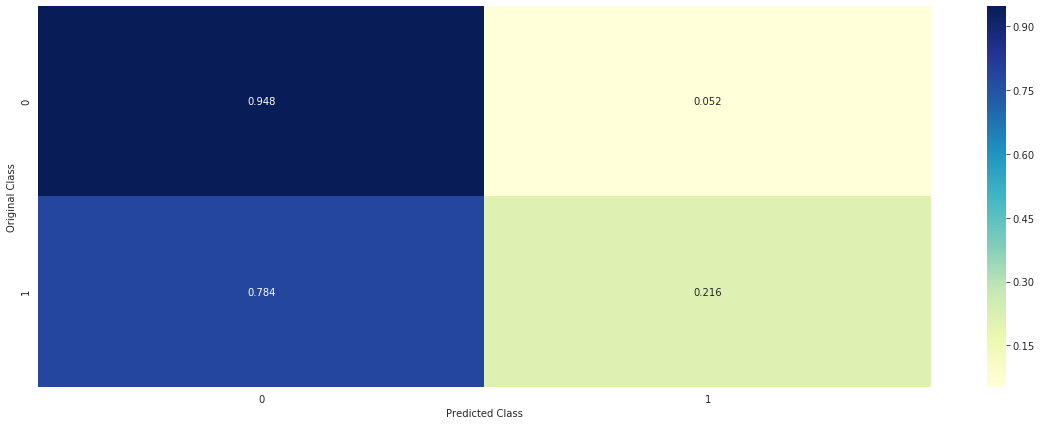

In [0]:
plot_confusion_matrix(Y_test,Y_predict_nb)

**Confusion, Precision and Recall matrix explanation**

1. Confusion matrix
   For confusion matrix our logistic regression model        predicted only 79+290 data points inaccurately 

2. Precision matrix 
   precision=TP/TP+FP
   which makes column sum 1
   precision tells us model predicted positive 
   what percentage actually predicted positive

3. Recall matrix
   recall=TP/TP+FN
   which makes row sum as 1
   Recall tells us of all the original true data 
   points what percentage our model predicted positive

**9.7 Stacking classifier**

Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

In [0]:
 from mlxtend.classifier import StackingClassifier
 #estimators = [('Logistic Regression', clf_model), ('random forest Trees', clf_model_rf), ('SVM', clf_model_svm), ('GBDT', clf_model_gbdt), ('MLP', mlp_classifier),('NB', clf_model_nb)]
 clf_stacking = StackingClassifier(classifiers=[clf_model,clf_model_rf,clf_model_svm,clf_model_gbdt,mlp_classifier,clf_model_nb], meta_classifier=LogisticRegression())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
clf_stacking.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=3.9860601523805474,
                                                   class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='warn', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                RandomForestClassifier(bootstrap=True,
                              

In [0]:
Y_predict_stacking=clf_stacking.predict(X_test)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_predict_stacking)
metrics.auc(fpr, tpr)

0.9986486486486487

In [0]:
print("*********************************************accuracy*********************************")
print(accuracy_score(Y_test, Y_predict_stacking))
print("*********************************************f1_score*********************************")
print(f1_score(Y_test, Y_predict_stacking))
print("*********************************************recall_score*****************************")
print(recall_score(Y_test, Y_predict_stacking))
print("*********************************************precision_score**************************")
print(precision_score(Y_test, Y_predict_stacking))

*********************************************accuracy*********************************
0.9994669509594882
*********************************************f1_score*********************************
0.9986468200270636
*********************************************recall_score*****************************
0.9972972972972973
*********************************************precision_score**************************
1.0


Expectation from staking classfier were high and it performed as expected 

#**10. Conclusion**

In [0]:
x = PrettyTable()

In [0]:
x.field_names = ["Type of algorithm","F1 score","accuracy","precision","recall","auc"]

In [0]:
x.add_row(["Logistic Regression","0.971","0.988","0.980","0.962","0.988"])
x.add_row(["Random Forest","0.998","0.999","1.0","0.997","0.999"])
x.add_row(["SVM","0.994","0.997","1.0","0.989","0.999"])
x.add_row(["GBDT","0.998","0.999","1.0","0.997","0.999"])
x.add_row(["MLP","0.975","0.990","0.965","0.986","0.988"])
x.add_row(["NB","0.302","0.8033","0.503","0.216","0.66"])
x.add_row(["Stacking classifier","0.998","0.999","1","0.997","0.998"])

In [0]:
print(x)

+---------------------+----------+----------+-----------+--------+-------+
|  Type of algorithm  | F1 score | accuracy | precision | recall |  auc  |
+---------------------+----------+----------+-----------+--------+-------+
| Logistic Regression |  0.971   |  0.988   |   0.980   | 0.962  | 0.988 |
|    Random Forest    |  0.998   |  0.999   |    1.0    | 0.997  | 0.999 |
|         SVM         |  0.994   |  0.997   |    1.0    | 0.989  | 0.999 |
|         GBDT        |  0.998   |  0.999   |    1.0    | 0.997  | 0.999 |
|         MLP         |  0.975   |  0.990   |   0.965   | 0.986  | 0.988 |
|          NB         |  0.302   |  0.8033  |   0.503   | 0.216  |  0.66 |
| Stacking classifier |  0.998   |  0.999   |     1     | 0.997  | 0.998 |
+---------------------+----------+----------+-----------+--------+-------+


F1 score of GBDT is the highest so we can conclude that GBDT works best although stacking also performs same way but it is more expensive to use over GBDT.
We took F1 score as the best matrix because F1 takes the harmonic mean of precision and recall.
Accuracy is not very good matrix for imbalanced data, in case of precision and recall we have to see both parameters to compare the model.That is again not a very good process.
AUC can be high for dumb model so it is also not very good matrix as compared to f1 score.

so we generate predicted file using GBDT

In [0]:
test_predict=clf_model_gbdt.predict(data_test)

In [0]:
id_person = data_test.iloc[:,0].values
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', id_person.astype(int))
Prediction.insert(1, 'Category', test_predict.astype(int))
Prediction.to_csv("Prediction_majority_class.csv", index=False)
Prediction

Id  Category
0     10490         0
1      7211         0
2      7109         0
3      5567         0
4      6677         0
...     ...       ...
1495   8407         0
1496    186         1
1497   1761         1
1498   3776         0
1499   2354         0

[1500 rows x 2 columns]